ПИН-б-з-19-1 Лычкин А.В.

**Используя функцию dataset, сгенерируйте линейные зависимости с другими параметрами a, b, N, noise_power
и проверьте модель линейной регрессии на этих данных**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [10]:
def true_fun(x, a=np.pi, b = 0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)

    if f is None: f = lambda x:x # line
    x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)],axis=0)

    return f(x+ b)

def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None,  N = 250, x_max =1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)

    if random_x:
        x = np.sort(np.random.rand(N))*x_max
    else:
        x = np.linspace(0,x_max,N)

    y_true = np.array([])

    for f_ in np.append([], f):
        y_true=np.append(y_true, true_fun(x, a, b, f_))

    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

**Линейная зависимость**

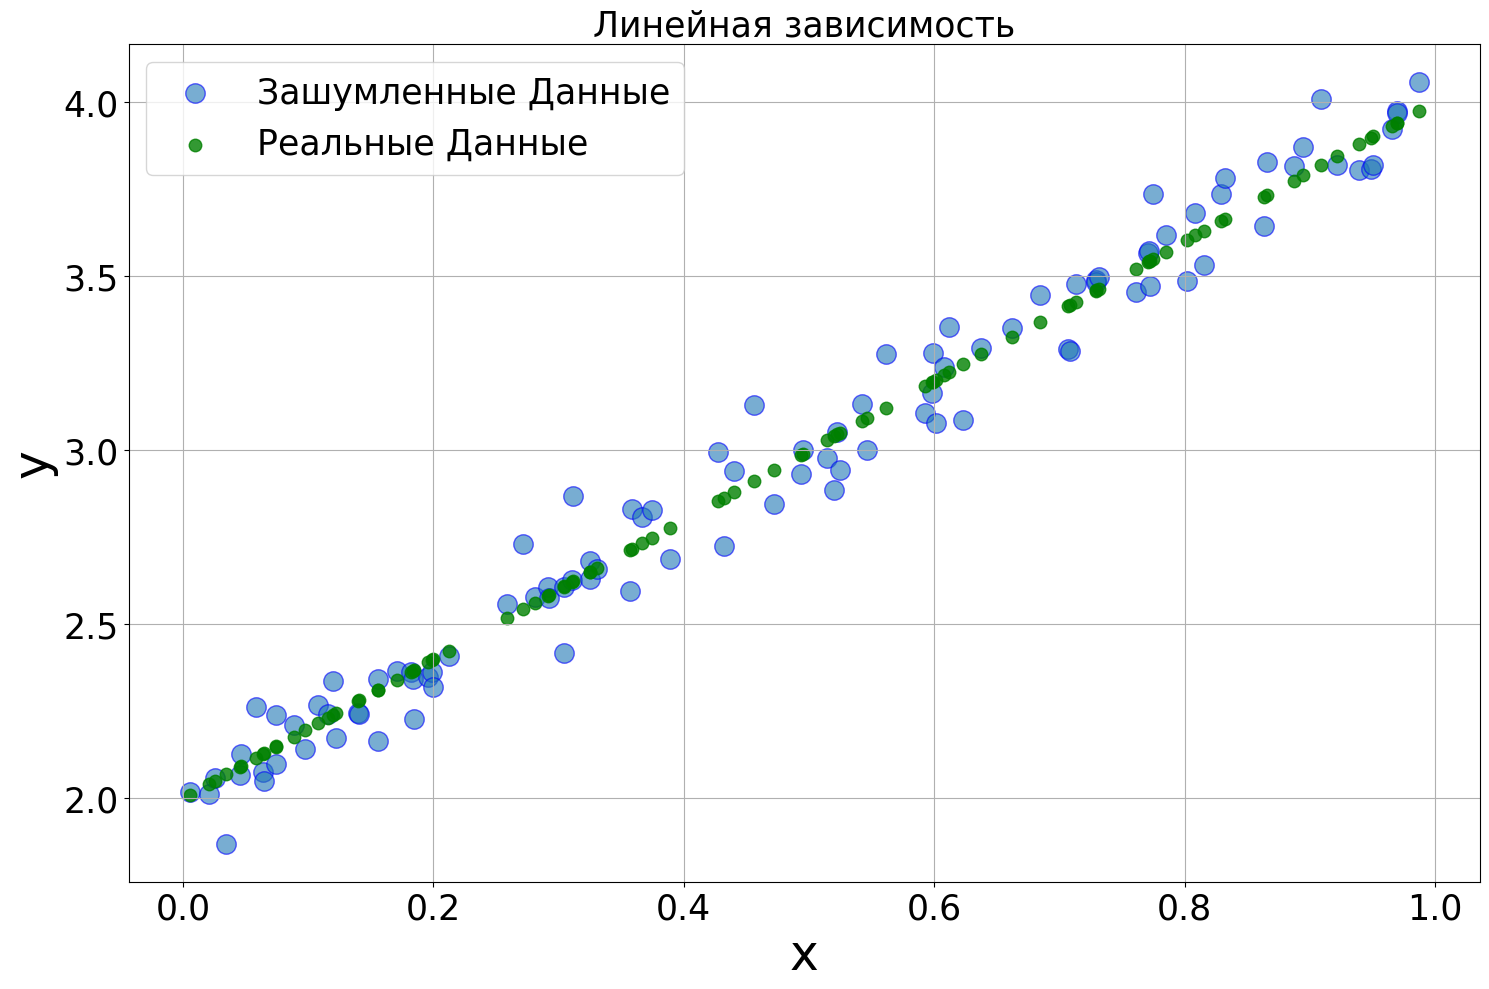

In [16]:
def vis_data(y, y_true,x, title):
    fig  = plt.figure(figsize=(15,10))
    plt.scatter(x[:,0], y, edgecolor='b', label="Зашумленные Данные",s=196, alpha = 0.6)
    plt.scatter(x[:,0], y_true,label="Реальные Данные", s=81,c='g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35)
    plt.legend(fontsize=25)
    plt.title(title, fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tight_layout()

noise_power = 0.1

y, y_true, x = dataset(a = 2, b = 2,
                       f = None,  N = 100,
                       x_max =1,
                       noise_power = noise_power,
                       seed = 42)
vis_data(y, y_true,x, 'Линейная зависимость')

**Проверка модели линейной регрессии**

In [20]:
def train_test_split(x,y, train_size=None, test_size=None, random_state=42, shuffle=True,):
    if random_state: np.random.seed(random_state)

    size = y.shape[0]
    idxs = np.arange(size)
    if shuffle: np.random.shuffle(idxs)

    if test_size and train_size is None:
        if (test_size<= 1):  train_size = 1 - test_size
        else:  train_size = size - test_size
        test_size = None

    if train_size is None or train_size > size: train_size = size

    if (train_size<= 1): train_size *= size

    if test_size is not None:
        if test_size<= 1: test_size *= size
        if test_size>size: test_size = size-train_size
    else: test_size = 0

    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    x_val,   y_val   = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]

    if test_size > 0:
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        return x_train, y_train.squeeze(), x_val, y_val.squeeze(), x_test, y_test.squeeze()
    return x_train, y_train.squeeze(), x_val, y_val.squeeze()


x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(x, y, train_size = 0.5, test_size=0.3, )
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape )


x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(50, 1) (50,) (20, 1) (20,) (30, 1) (30,)
(70, 1) (70,) (30, 1) (30,)


In [24]:
def init_weights(W_shape, add_bias = True, random_state = 42):
    W_shape = np.atleast_1d(W_shape)
    if random_state:
        np.random.seed(random_state)
    W = np.random.randn(*list(W_shape))/np.sqrt(np.sum(W_shape))
    if add_bias:
        W = np.column_stack((np.zeros(W.shape[-1]),W ))
    return W.squeeze()

def predict( X, W, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]),X))
    else:
        X_full = X
    return  np.dot(X_full,W)

def loss_func(yhat, y):
    return np.square(yhat - y)

weights = init_weights(x.shape[1])
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

print(f'{weights}')
print(f'predict {yhat},\nground truth {y[0]},\nloss: {loss}')

[0.         0.49671415]
predict [0.4015424],
ground truth [2.01974894],
loss: [2.6185924]


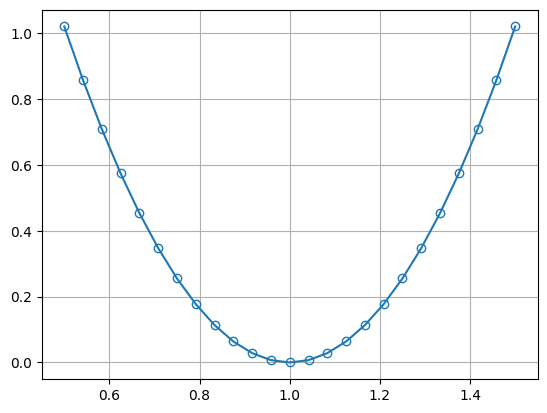

In [27]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 25)
yhat = decline* y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline,loss,'-o', mfc = 'none'); plt.grid();

**Используя функцию dataset, сгенерируйте гармонические зависимости с другими параметрами (см. с. 50) и проверьте различные степени полиномов исходных данных и разные типы
регуляризации. Посмотрите, что произойдет, если увеличить
регуляризационный множитель.**

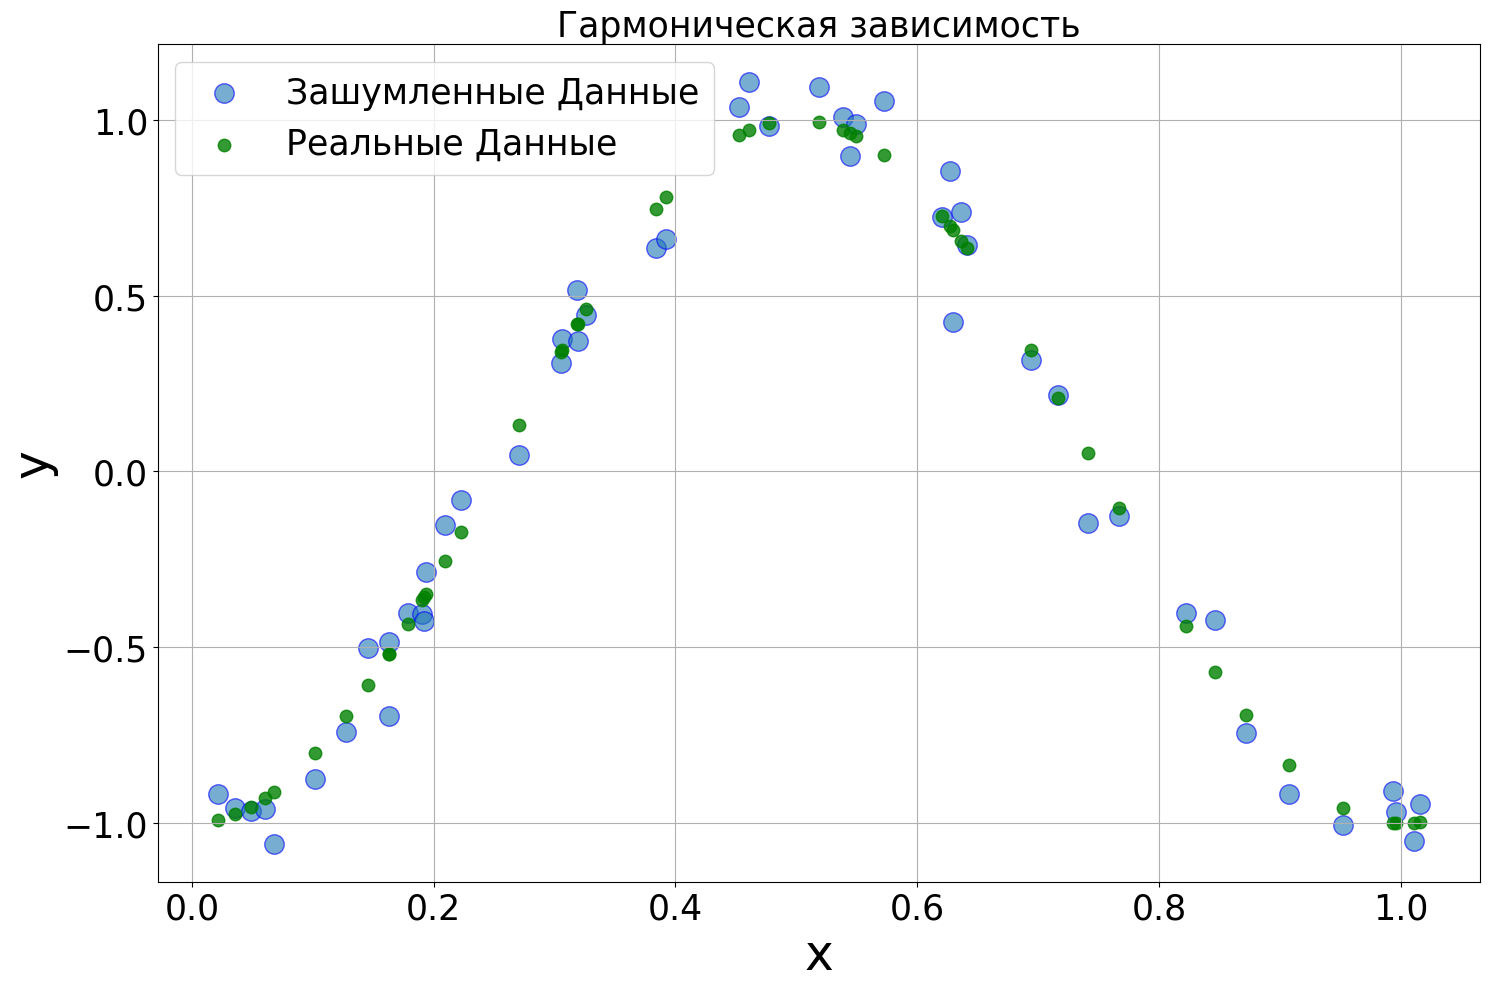

In [28]:
y, y_true, x = dataset(a = 2*np.pi,
                       b = np.pi, f = np.cos,
                       N = 50, x_max =np.pi/3,
                       noise_power = 0.1, seed = 42)
vis_data(y, y_true,x, 'Гармоническая зависимость')